# Interactive Visualization Lab (OPTIONAL)

Complete the following set of exercises to solidify your knowledge of interactive visualization using Plotly, Cufflinks, and IPyWidgets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as p
import cufflinks as cf
from plotly import tools
import warnings
import seaborn as sns
from ipywidgets import interact
%matplotlib inline

warnings.filterwarnings('ignore')
cf.go_offline()

Please download the Online_retail dataset dataset from [here](https://drive.google.com/file/d/1jD7eQYnfcvbm1ksDbD12U22JtbKItU7E/view?usp=sharing), place it in the data folder.<br>
Load the data:

In [5]:
#paolo: here you are calling data before defining it- be careful it gives error,
#paolo; remember to execute notebook top to bottom!
data[data["Description"]=="PARTY BUNDING"]

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country


In [4]:
#paolo: remember relative path to data folder- I added it here
data = pd.read_excel('../data/Online_Retail.xlsx')
data.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
3,536390,2010-12-01 10:19:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,64,2.55,163.2,17511,United Kingdom
4,536394,2010-12-01 10:39:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.6,13408,United Kingdom


## 1. Create an interactive line chart showing quantity and revenue sold to France between January 1st and May 31st 2011.

In [6]:
# Transform the data
data_jan_may = data.copy()
data_jan_may  = data_jan_may [(data_jan_may ['InvoiceDate'] > '2011-01-01') & 
                              (data_jan_may ['InvoiceDate'] <= '2011-05-31')]
data_jan_may_fr = data_jan_may[data_jan_may["Country"]=="France"]
data_jan_may_fr.head(3)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
807,551163,2011-04-26 15:52:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,9,2.95,26.55,12573,France
2645,540976,2011-01-12 15:00:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,3.75,15.00,12652,France
3290,545181,2011-02-28 14:45:00,22752,SET 7 BABUSHKA NESTING BOXES,4,8.50,34.00,12509,France


In [7]:
data_jan_may_fr[["Quantity","Revenue","Country"]]

,Quantity,Revenue,Country
807,9,26.55,France
2645,4,15.00,France
3290,4,34.00,France
4614,160,232.00,France
4795,160,232.00,France
...,...,...,...
345712,2,15.00,France
345885,2,25.00,France
345892,4,50.00,France
346009,4,35.80,France


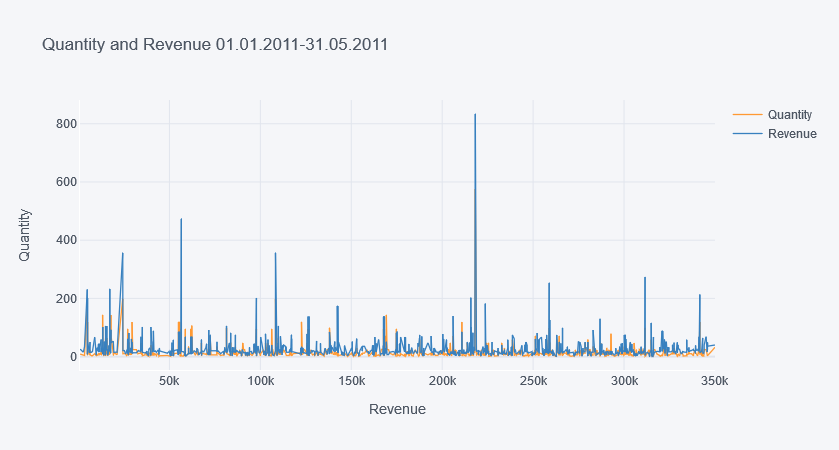

In [8]:
# Plot
data_jan_may_fr[["Quantity","Revenue"]].iplot(xTitle="Revenue",yTitle="Quantity",
                            title="Quantity and Revenue 01.01.2011-31.05.2011")

In [ ]:
#paolo: good effort but not exactly- check solutions

## 2. Create an interactive scatter plot showing the relationship between average quantity (x-axis) and average unit price (y-axis) for the product PARTY BUNTING with the plot points color-coded by country (categories).

In [9]:
# Transform the data
qty_price_pv = data.copy()
qty_price_pv = data[data["Description"]=="PARTY BUNTING"]
qty_price_pv = pd.pivot_table(qty_price_pv,values=["Quantity","UnitPrice"],
                              columns=["Country"]).T.reset_index()
qty_price_pv

,Country,Quantity,UnitPrice
0,Australia,33.125000,4.712500
1,Austria,8.000000,4.950000
2,Belgium,4.000000,4.950000
3,Channel Islands,13.333333,4.950000
4,Cyprus,2.333333,4.750000
5,Denmark,12.000000,4.950000
6,EIRE,21.210526,4.739474
7,Finland,6.000000,4.950000
8,France,5.727273,4.922727
9,Germany,6.800000,4.890000


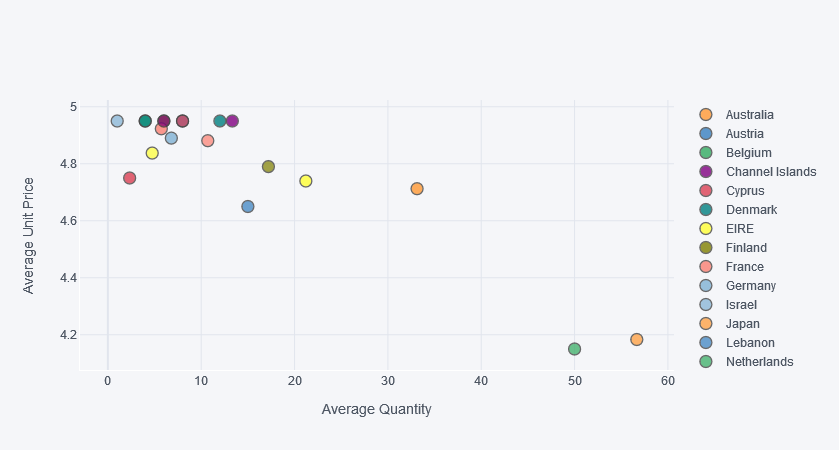

In [10]:
qty_price_pv.iplot(x="Quantity",y="UnitPrice",categories="Country",xTitle="Average Quantity",
                  yTitle="Average Unit Price")

## 3. Create a set of interactive histograms showing the distributions of quantity per invoice for the following countries: EIRE, Germany, France, and Netherlands. Hint: Use subplots

In [23]:
data_cnt.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
179,539320,2010-12-16 19:16:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,24,2.95,70.8,14911,EIRE
198,539722,2010-12-21 13:45:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,24,2.95,70.8,14911,EIRE
304,541570,2011-01-19 12:34:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,256,2.55,652.8,14646,Netherlands
322,541979,2011-01-24 14:54:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.95,17.7,14911,EIRE
367,542777,2011-02-01 08:31:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.95,17.7,14911,EIRE


In [28]:
# Transform the data
data_cnt = data.copy()
data_cnt = data_cnt[(data_cnt["Country"]=="EIRE") | (data_cnt["Country"]=="Germany") |
                    (data_cnt["Country"]=="Netherlands") | (data_cnt["Country"]=="France")]

qty_inv = pd.pivot_table(data_cnt,values="Quantity",columns="InvoiceNo",
                         index="Country",aggfunc="count").T
qty_inv.sample(5)
#paolo: ok I think you should use "sum" instead of "count"

Country,EIRE,France,Germany,Netherlands
InvoiceNo,,,,
547821,NaN,NaN,4.0,NaN
559797,NaN,NaN,20.0,NaN
572895,NaN,NaN,3.0,NaN
566846,5.0,NaN,NaN,NaN
574058,NaN,NaN,NaN,1.0


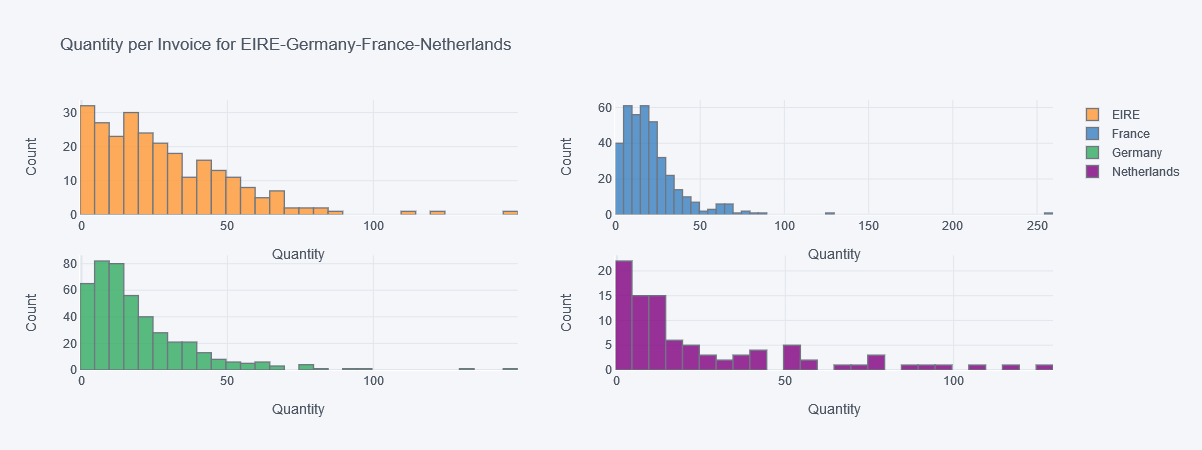

In [29]:
# Plot
qty_inv.iplot(kind="hist",subplots=True,xTitle="Quantity",yTitle="Count",
             title="Quantity per Invoice for EIRE-Germany-France-Netherlands")

In [ ]:
#paolo: very nice visualizations!!

## 4. Create an interactive line chart showing quantity sold by day for the United Kingdom. Add drop-down boxes for Year and Month that allow you to filter the date range that appears in the chart.

In [13]:
import chart_studio.plotly as py
import cufflinks as cf
import pandas as pd

from ipywidgets import interact
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

cf.go_offline()
%matplotlib inline

In [14]:
data.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
3,536390,2010-12-01 10:19:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,64,2.55,163.2,17511,United Kingdom
4,536394,2010-12-01 10:39:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.6,13408,United Kingdom


In [15]:
# Transform the data
#data_uk=data.copy()
data_uk = data[data["Country"]=="United Kingdom"]
pd.pivot_table(data_uk,values="Quantity",columns="InvoiceDate").T

,Quantity
InvoiceDate,
2010-12-01 08:26:00,5.714286
2010-12-01 08:28:00,6.000000
2010-12-01 08:34:00,6.125000
2010-12-01 08:35:00,3.000000
2010-12-01 09:00:00,80.000000
...,...
2011-12-09 12:21:00,9.000000
2011-12-09 12:23:00,38.000000
2011-12-09 12:25:00,60.000000


In [ ]:
# Variables


In [ ]:
# Interactive menu
# Plot

# Bonus 

## 5. Create an interactive scatter plot that plots number of invoices (x-axis) vs. number of customers (y-axis) and the plot points represent individual products. Add two sliders, one for the x-axis and another one for the y-axis, so that you can change the axis range. 

In [ ]:
# Transform the data


In [ ]:
# Interactive menu
# Plot